## Unicorn Companies Analysis

### Data Cleaning and Preprocessing
- Load the dataset: Read the CSV file into a pandas DataFrame.
- Data types conversion: Convert appropriate columns to their respective data types (e.g., 'Valuation ($B)' to float, 'Date Joined' to datetime).
- Handle missing values: Decide on a strategy to handle missing values (e.g., remove rows, fill with a placeholder).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Unicorn_Companies.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


In [3]:
df.shape

(1037, 13)

In [4]:
df.rename(columns={'Select Inverstors': 'Select Investors'}, inplace=True)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1037 non-null   object 
 1   Valuation ($B)    1037 non-null   object 
 2   Date Joined       1037 non-null   object 
 3   Country           1037 non-null   object 
 4   City              1037 non-null   object 
 5   Industry          1037 non-null   object 
 6   Select Investors  1020 non-null   object 
 7   Founded Year      994 non-null    float64
 8   Total Raised      1013 non-null   object 
 9   Financial Stage   49 non-null     object 
 10  Investors Count   1036 non-null   float64
 11  Deal Terms        1008 non-null   float64
 12  Portfolio Exits   49 non-null     float64
dtypes: float64(4), object(9)
memory usage: 105.4+ KB


#### Data Type Conversion 
- Valuation -> Float
- Date Joined -> Date & Time
- Founded Year -> Integer 
- Total Raised -> Float
- Investors Count -> ?  # check if there is any value that is not an int - if not then convert this to integer

In [6]:
# 1. Converting Valuation to float (remove $ sign and convert the remainder string to float)
df["Valuation ($B)"] = df["Valuation ($B)"].str.replace("$", "").astype(float)

In [7]:
# 2. Converting Date Joined to date & time
df["Date Joined"] = pd.to_datetime(df["Date Joined"])

In [8]:
# 3. Converting Founded Year from float to date

nan_perc = (df[df["Founded Year"].isna()].shape[0] / df.shape[0]) * 100
print(str(round(nan_perc, 2)) + "% of Founded Year is NaN")
# There are only 43 rows with NaN - should we drop those rows now? nope coz this question will be asked later

df["Founded Year"] = pd.to_datetime(df["Founded Year"], format="%Y", errors="coerce").dt.year
df["Founded Year"] = df["Founded Year"].fillna(0).astype(int)


4.15% of Founded Year is NaN


In [9]:
# 4. Converting Total Raised from string to float

# Total raised contains both M & B - Will reuse function from previous assignment to extract value as float 
def apply_scale(value):
    if pd.isna(value):
        return np.nan
    
    if 'B' in value:
        return float(value.replace('$', '').replace('B', '')) * 1e9
    elif 'M' in value:
        return float(value.replace('$', '').replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('$', '').replace('K', '')) * 1e3
    else: 
        return  float(value.replace('$', ''))

df["Total Raised"] = df["Total Raised"].apply(apply_scale)
#df["Total Raised"] = df["Total Raised"].astype(int)

In [10]:
# 4. Converting Investors Count from float to int
print(df["Investors Count"].isna().sum(), "Null value in Investors Count column so it will be filled with 0")
df["Investors Count"] = df["Investors Count"].fillna(0).astype(int)

1 Null value in Investors Count column so it will be filled with 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1037 non-null   object        
 1   Valuation ($B)    1037 non-null   float64       
 2   Date Joined       1037 non-null   datetime64[ns]
 3   Country           1037 non-null   object        
 4   City              1037 non-null   object        
 5   Industry          1037 non-null   object        
 6   Select Investors  1020 non-null   object        
 7   Founded Year      1037 non-null   int64         
 8   Total Raised      1013 non-null   float64       
 9   Financial Stage   49 non-null     object        
 10  Investors Count   1037 non-null   int64         
 11  Deal Terms        1008 non-null   float64       
 12  Portfolio Exits   49 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 105.4+ KB


In [12]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,IPO,28,8.0,5.0
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,NaN,29,12.0,NaN
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,Asset,39,12.0,1.0
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,Acquired,56,13.0,1.0
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,Acquired,25,5.0,2.0


#### Data Cleaning
- Fixing null cells

In [13]:
print("Percentage of missing value in each column")
df.isnull().sum() * (100/df.shape[0])

Percentage of missing value in each column


Company              0.000000
Valuation ($B)       0.000000
Date Joined          0.000000
Country              0.000000
City                 0.000000
Industry             0.000000
Select Investors     1.639344
Founded Year         0.000000
Total Raised         2.314368
Financial Stage     95.274831
Investors Count      0.000000
Deal Terms           2.796528
Portfolio Exits     95.274831
dtype: float64

If 'Financial Stage' and 'Portfolio Exits' columns are not important then these should be removed since 95% of the values are missing and not much can be inferred from the very little information available. However, these columns won't be removed because they will be used later on.

The rows with null in 'Select Investors' can be replaced with unknown

In [14]:
df['Select Investors'] = df['Select Investors'].fillna('Unknown')

The rows with 'Total Raised' can be filled with median so that there is not much descrepancy in the statistics

In [15]:
df['Total Raised'].describe()

count    1.013000e+03
mean     5.757672e+08
std      7.360876e+08
min      1.000000e+04
25%      2.273400e+08
50%      3.777000e+08
75%      6.337800e+08
max      7.440000e+09
Name: Total Raised, dtype: float64

In [16]:
# Fill missing values for 'Total Raised' with the median value
total_raised_median = df['Total Raised'].median()
df['Total Raised'] = df['Total Raised'].fillna(total_raised_median)

The rows with 'Deal Terms' can be filled with median

In [17]:
df['Deal Terms'].describe()

count    1008.000000
mean        3.093254
std         2.159764
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: Deal Terms, dtype: float64

In [18]:
# Fill missing values for 'Total Raised' with the median value
deal_terms_median = df['Deal Terms'].median()
df['Deal Terms'] = df['Deal Terms'].fillna(deal_terms_median)

- Fixing Mispelled Values

In [19]:
print(df['Industry'].unique())

['Artificial intelligence' 'Other' 'Fintech'
 'Internet software & services' 'Supply chain, logistics, & delivery'
 'Data management & analytics' 'Sequoia Capital, Thoma Bravo, Softbank'
 'E-commerce & direct-to-consumer' 'Edtech' 'Hardware' 'Consumer & retail'
 'Health' 'Auto & transportation' 'Finttech' 'Cybersecurity'
 'Mobile & telecommunications' 'Travel' 'Kuang-Chi'
 'Tiger Global Management, Tiger Brokers, DCM Ventures'
 'Jungle Ventures, Accel, Venture Highway' 'Artificial Intelligence'
 'Vision Plus Capital, GSR Ventures, ZhenFund'
 'Hopu Investment Management, Boyu Capital, DC Thomson Ventures'
 '500 Global, Rakuten Ventures, Golden Gate Ventures'
 'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund'
 'Sequoia Capital China, Shunwei Capital Partners, Qualgro'
 'Dragonfly Captial, Qiming Venture Partners, DST Global'
 'SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures'
 'Mundi Ventures, Doqling Capital Partners, Activant Capital'
 'Vertex Ventures SE Asia, Global Fo

In [20]:
# Replace misspelled values
df['Industry'] = df['Industry'].replace({'Artificial intelligence': 'Artificial Intelligence',
                                          'Finttech': 'Fintech'})

#### Answer the following questions:

1. Highest Valuation: Which company has the highest valuation in the dataset?


In [21]:
df.nlargest(1, 'Valuation ($B)')

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,IPO,28,8.0,5.0


In [22]:
print("{} company has the highest valuation".format(df.nlargest(1, 'Valuation ($B)')['Company'].values[0]))


Bytedance company has the highest valuation


2. Missing 'Founded Year': How many companies do not have a 'Founded Year' recorded in the dataset?

In [23]:
print(df["Founded Year"].isin([0]).sum(), "companies don't have founded year")

43 companies don't have founded year


3. No Listed Investors: How many companies do not have any investors listed in the 'Select Investors' column?

In [24]:
print(df["Select Investors"].isin(["Unknown"]).sum(), "companies don't have Select Investors")

17 companies don't have Select Investors


4. Most Unicorns by Country: Which country has the highest number of unicorn companies?

In [25]:
country_count_grouped = df.groupby(['Country']).count()
country_count_grouped

,Company,Valuation ($B),Date Joined,City,Industry,Select Investors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
Country,,,,,,,,,,,,
Argentina,1,1,1,1,1,1,1,1,0,1,1,0
Australia,6,6,6,6,6,6,6,6,0,6,6,0
Austria,2,2,2,2,2,2,2,2,0,2,2,0
Bahamas,1,1,1,1,1,1,1,1,1,1,1,1
Belgium,3,3,3,3,3,3,3,3,0,3,3,0
Bermuda,1,1,1,1,1,1,1,1,0,1,1,0
Brazil,16,16,16,16,16,16,16,16,2,16,16,2
Canada,19,19,19,19,19,19,19,19,0,19,19,0
Chile,2,2,2,2,2,2,2,2,0,2,2,0


In [26]:
country_count_grouped.nlargest(1, 'Company')

,Company,Valuation ($B),Date Joined,City,Industry,Select Investors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
Country,,,,,,,,,,,,
United States,536,536,536,536,536,536,536,536,16,536,536,16


In [27]:
print(country_count_grouped[['Company']].idxmax().values[0], "has the highest number of unicorn companies")

United States has the highest number of unicorn companies


5. Founded After 2010: How many companies were founded after the year 2010?

In [28]:
founded = df.loc[(df["Founded Year"] > 2010)]
print(founded.shape[0], "companies were founded after 2010")

785 companies were founded after 2010


6. Average Valuation by Industry: What is the average valuation of unicorn companies in each industry?

In [29]:
industry_grouped = df.groupby(['Industry'])['Valuation ($B)'].mean().reset_index()
industry_grouped

,Industry,Valuation ($B)
0,"500 Global, Rakuten Ventures, Golden Gate Vent...",1.100000
1,"Andreessen Horowitz, DST Global, IDG Capital",1.000000
2,Artificial Intelligence,4.075513
3,Auto & transportation,3.334483
4,"B Capital Group, Monk's Hill Ventures, Dynamic...",1.000000
5,Consumer & retail,3.005200
6,Cybersecurity,2.504082
7,Data management & analytics,3.313171
8,"Dragonfly Captial, Qiming Venture Partners, DS...",1.050000
9,E-commerce & direct-to-consumer,3.041028


7. Top 5 Cities: Which are the top 5 cities with the highest number of unicorn companies?

In [30]:
city_count_grouped = df.groupby(['City']).count()

In [31]:
city_count_grouped.nlargest(5, 'Company')

,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
City,,,,,,,,,,,,
San Francisco,145,145,145,145,145,145,145,145,8,145,145,8
New York,96,96,96,96,96,96,96,96,2,96,96,2
Beijing,63,63,63,63,63,63,63,63,5,63,63,5
Shanghai,43,43,43,43,43,43,43,43,1,43,43,1
London,33,33,33,33,33,33,33,33,5,33,33,5


8. Financial Stage Distribution: What is the distribution of companies across different financial stages?

In [32]:
df['Financial Stage'] = df['Financial Stage'].replace('Acq', 'Acquired')
#df['Financial Stage'] = df['Financial Stage'].fillna('Unknown')

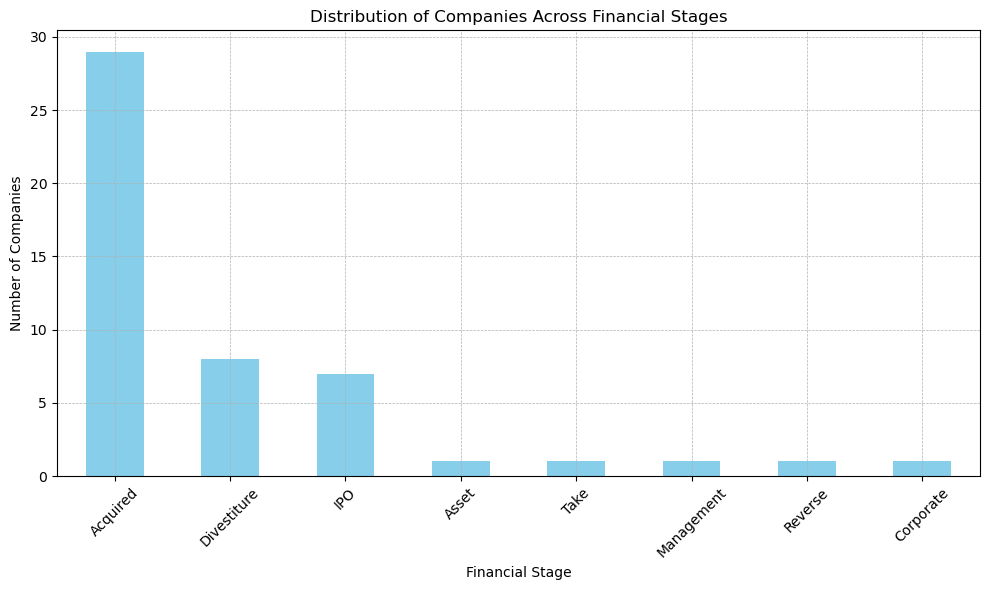

In [33]:
# Calculate the distribution of companies across financial stages
stage_distribution = df['Financial Stage'].value_counts()

# Plotting the distribution as a bar chart
plt.figure(figsize=(10, 6)) 
stage_distribution.plot(kind='bar', color='skyblue') 
plt.title('Distribution of Companies Across Financial Stages')  
plt.xlabel('Financial Stage')  # Label the x-axis
plt.ylabel('Number of Companies')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()  # Display the plot


9. Most Portfolio Exits: Which companies have the most portfolio exits?

In [34]:
df['Portfolio Exits'].unique()


array([ 5., nan,  1.,  2.,  3.])

In [35]:
exits = df.loc[(df['Portfolio Exits'] == 5.0)]
print(exits['Company'].values[0], 'has the most exits')

Bytedance has the most exits


10. Valuation and Total Raised Correlation: What is the correlation between 'Valuation ($B)' and 'Total Raised'?